# S03 T04: Pràctica amb programació numèrica <h1>
Familiaritza't amb la Programacio Numerica a traves de la llibreria NumPy.

## Nivell 1 

###### - Exercici 1 
- Crea una funció que donat un Array d’una dimensió, et faci un resum estadístic bàsic de les dades. Si detecta que l’array té més d’una dimensió, ha de mostrar un missatge d’error.

In [290]:
import numpy as np
import random

def funcio(array):
    if(len(array.shape)==1):
        print("Array: \n", array)
        print("\n- Average: \n\t", np.average(array))
        print("\n- Median: \n\t", np.median(array))
        vals, counts = np.unique(array, return_counts=True)
        mode_value = np.argwhere(counts == np.max(counts))
        print("\n- Moda: \n\t", ', '.join(map(str,vals[mode_value].flatten().tolist())))
        print("\n- Range: \n\t", np.max(array)-np.min(array))
        print("\n- Standard deviation: \n\t", format(np.std(array),'.2f'))
    else:
        print("L'array te dos o mes dimensions.")

y = np.array([])
y = y.astype('int64')
for x in range(50):
    y = np.append(y, random.randint(1,100))
funcio(y)


Array: 
 [ 3 39 99 47 70 83 46 23 15 10 85 91 28 74 98 78 93 41 77 25 80 25 29  8
 75 98 67 94 20 15 64 71 13  3 25 54 49 87 48 95 32 18 64 23 39 33 25 31
 78 22]

- Average: 
	 50.2

- Median: 
	 46.5

- Moda: 
	 25

- Range: 
	 96

- Standard deviation: 
	 29.88


###### - Exercici 2
- Crea una funció que et generi un quadrat NxN de nombres aleatoris entre el 0 i el 100.

In [292]:
length = np.array([])             #create an empty numpy array with type 'int64'
length = length.astype('int64')      
y = int(input("Enter the lenght of the square (1-99): "))    

def executa(y, length):
    
    def gen(y, length):
        for x in range(y):
            length = np.append(length, random.randint(1,y))       # function to create a numpy array with random numbers
        return length

    def square_one(y, length):
        l = '\t'.join(map(str, length.flatten().tolist()))  # creation and display of an square with the numbers on the array
        print(l, "\n\n")                                    # (empty inside)
        for x in length[1:-1]:
            print(x, "\t"*int(y-1), x, "\n\n")
        print(l)

    def square_two(y, length):
        l = ' '.join(map(str,length.flatten().tolist()))  # creation and display of a square with the numbers on the array
        for r in range(y):                                # (filled inside)
            print("\t", l)
    
    length = gen(y, length)
    print("Length of each side: ", y)
    print("Numbers generated: ", length)
    print("\n\n- SQUARE 1 GENERATED: \n")
    square_one(y, length)
    print("\n\n- SQUARE 2 GENERATED: \n")
    square_two(y, length)

executa(y, length)

Enter the lenght of the square (1-99): 7
Length of each side:  7
Numbers generated:  [7 2 4 2 5 5 4]


- SQUARE 1 GENERATED: 

7	2	4	2	5	5	4 


2 						 2 


4 						 4 


2 						 2 


5 						 5 


5 						 5 


7	2	4	2	5	5	4


- SQUARE 2 GENERATED: 

	 7 2 4 2 5 5 4
	 7 2 4 2 5 5 4
	 7 2 4 2 5 5 4
	 7 2 4 2 5 5 4
	 7 2 4 2 5 5 4
	 7 2 4 2 5 5 4
	 7 2 4 2 5 5 4


###### - Exercici 3
- Crea una funció que donada una taula de dues dimensions, et calculi els totals per fila i els totals per columna.

In [181]:
k = np.random.randint(1, high=100, size=(5,5), dtype='int64')     # generate a 5x5 np.array with random numbers from 1 to 99
print(k)

[[24  9 52 90 57]
 [37 85 46 56 54]
 [67 58 57  2 75]
 [ 2 45 92 90 28]
 [26 36 13 53 41]]


In [182]:
def totals(k):
    sum_fls = []
    for x in range(k.shape[1]):     # iterate thru the columns to get the total sum and save it in a list
        y = np.sum(k[:,x])
        sum_fls.append(y)
    
    sum_cls = []
    for x in range(k.shape[0]):      # iterate thru the rows to get the total sum and save it in a list
        y = np.sum(k[x,:])
        sum_cls.append(y)
    
    z=0
    for x in k:
        print(x, "   [", sum_cls[z], "]")    # print totals beside each respective row
        z+=1
        
    print("\n", sum_fls)         # print totals below each respective column
    

    
totals(k)

[24  9 52 90 57]    [ 232 ]
[37 85 46 56 54]    [ 278 ]
[67 58 57  2 75]    [ 259 ]
[ 2 45 92 90 28]    [ 257 ]
[26 36 13 53 41]    [ 169 ]

 [156, 233, 260, 291, 255]


###### - Exercici 4
- Implementa manualment una funció que calculi el coeficient de correlació. Informa’t-en sobre els seus usos i interpretació.

**- Original formula**

(-0.5, 396.5, 160.5, -0.5)

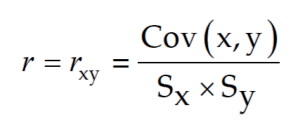

In [268]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import math

img_data = mpimg.imread("Desktop/coefcorr.png")
plt.figure(figsize=(5,7))
plt.imshow(img_data)
plt.axis('off')

**- Creation of numbers in an array:**

In [281]:
data = np.array([[1,1],[2,3],[3,6],[4,7]])     # creation of a 4x2 array
print(data)
data.shape

[[1 1]
 [2 3]
 [3 6]
 [4 7]]


(4, 2)

**- Sum of each axis' values:**

In [282]:
sumX = np.sum(data[:,0])    # calculate sum of X and Y by separate
print(sumX)
sumY = np.sum(data[:,1])
print(sumY)

10
17


**- Average of each axis' values:**

In [283]:
N = len(data)
avgX = sumX/N             # calculate average of X and Y by separate
print(avgX)
avgY = sumY/N
print(avgY)

2.5
4.25


**- Covariance of XY:**

In [284]:
s = 0                     # calculate the covariance "Sxy"
varX = []                                    
varY = []                                     
for d in data:
    x, y = d[0], d[1]
    x = x-avgX            # calculate the variance of X and store in 'varX'
    varX.append(x)  
    y = y-avgY            # calculate the variance of Y and store in 'varY'
    varY.append(y)
    s = s + ((x)*(y))

Sxy = s/(N-1)
Sxy

3.5

**- Standard deviation of axis X:**

In [285]:
# calculate the standard deviation "Sx"
Sx = 0
for x in varX:
    s = x**2
    Sx = Sx + s    
Sx = round(math.sqrt(Sx/(N-1)),2)
Sx

1.29

**- Standard deviation of axis Y:**

In [286]:
# calculate the standard deviation "Sy"
Sy = 0
for y in varY:
    s = y**2
    Sy = Sy + s    
Sy = round(math.sqrt(Sy/(N-1)),2)
Sy

2.75

**- Gathering of all variables and calculation of CORRELATION COEFFICIENT:**

In [287]:
# FINAL STEP: CORRELATION COEFFICIENT
r = math.floor((Sxy/(Sx*Sy))*100)/100
r

0.98

**- Definitive code:**

In [294]:
data = np.array([[1,1],[2,3],[3,6],[4,7]])     # creation of a 4x2 array
data.shape

sumX = np.sum(data[:,0])    # calculate sum of X and Y by separate
sumY = np.sum(data[:,1])

N = len(data)
avgX = sumX/N             # calculate average of X and Y by separate
avgY = sumY/N

s = 0                     # calculate the covariance "Sxy"
varX = []                                    
varY = []                                     
for d in data:
    x, y = d[0], d[1]
    x = x-avgX            # calculate the variance of X and store in 'varX'
    varX.append(x)  
    y = y-avgY            # calculate the variance of Y and store in 'varY'
    varY.append(y)
    s = s + ((x)*(y))

Sxy = s/(N-1)

# calculate the standard deviation "Sx"
Sx = 0
for x in varX:
    s = x**2
    Sx = Sx + s    
Sx = round(math.sqrt(Sx/(N-1)),2)

# calculate the standard deviation "Sy"
Sy = 0
for y in varY:
    s = y**2
    Sy = Sy + s    
Sy = round(math.sqrt(Sy/(N-1)),2)

array([[1, 2, 3, 4],
       [1, 3, 6, 7]])

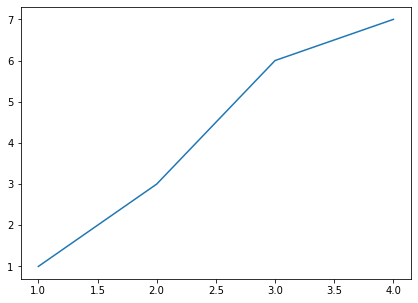

In [320]:
fig = plt.figure(figsize=(7,5))
plt.plot(data.T[0], data.T[1])
data.T

In [321]:
# FINAL STEP: CORRELATION COEFFICIENT
r = math.floor((Sxy/(Sx*Sy))*100)/100
print("DATA:\n", data.T, "\n\nCORRELATION COEFFICIENT:    ", r)

DATA:
 [[1 2 3 4]
 [1 3 6 7]] 

CORRELATION COEFFICIENT:     0.98
